In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score  # Added import for recall_score and f1_score

# Load the dataset
file_name = "/Users/marileonard/Desktop/DS Capstone/heart disease classification dataset (2).csv" # The uploaded file name
df = pd.read_csv(file_name)

# Handle unnamed column
if df.columns[0].startswith('Unnamed'):
    df = df.iloc[:, 1:]

# Data Cleaning and Preparation
# Convert the categorical target ('yes'/'no') to binary (1/0)
df['target'] = df['target'].map({'yes': 1, 'no': 0})

# Convert the categorical sex ('male'/'female') to binary (1/0)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Replace any non-standard missing values (like empty strings) with NaN
df = df.replace('', np.nan)

# Convert all columns to numeric, coercing any non-convertible values (if any) to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Handle Missing Values (Imputation)
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = logreg_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Use the properly imported recall_score function
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8033
Recall Score: 0.9394
F1 Score: 0.8378



Classification Report for Logistic Regression:

                      precision    recall  f1-score   support

No Heart Disease (0)       0.90      0.64      0.75        28
   Heart Disease (1)       0.76      0.94      0.84        33

            accuracy                           0.80        61
           macro avg       0.83      0.79      0.79        61
        weighted avg       0.82      0.80      0.80        61



<Figure size 800x800 with 0 Axes>

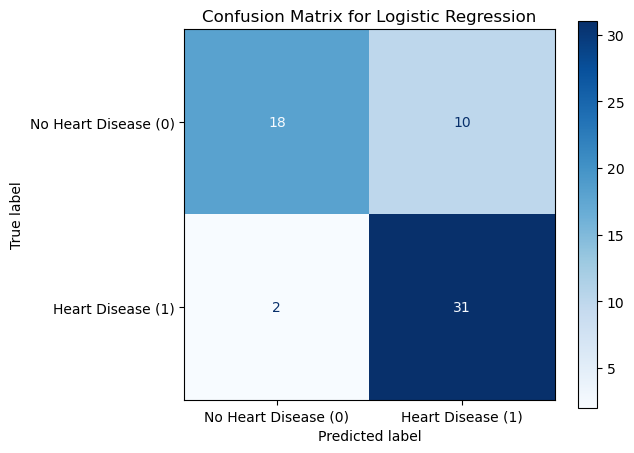

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the dataset
file_name = "/Users/marileonard/Desktop/DS Capstone/heart disease classification dataset (2).csv"
df = pd.read_csv(file_name)

# 1. Handle unnamed column (likely an index)
if df.columns[0].startswith('Unnamed'):
    df = df.iloc[:, 1:]

# 2. Data Cleaning and Preparation
# Convert target to binary (0/1)
df['target'] = df['target'].map({'yes': 1, 'no': 0})

# Convert sex to binary (0/1)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Replace any non-standard missing values (like empty strings) with NaN
df = df.replace('', np.nan)

# Convert all columns to numeric, coercing any non-convertible values (if any) to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Handle Missing Values (Imputation)
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# 5. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)

# 7. Predict and Evaluate
y_pred = logreg_classifier.predict(X_test_scaled)

# 8. Create Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease (0)', 'Heart Disease (1)'])

plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.grid(False) 
plt.tight_layout()
plt.savefig('logistic_regression_confusion_matrix.png') # Saves the image file

# 9. Print Classification Report
report = classification_report(y_test, y_pred, target_names=['No Heart Disease (0)', 'Heart Disease (1)'])

print("\nClassification Report for Logistic Regression:\n")
print(report)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA

# Load the dataset
file_name = "/Users/marileonard/Desktop/DS Capstone/heart disease classification dataset (2).csv"
df = pd.read_csv(file_name)

# Handle unnamed column
if df.columns[0].startswith('Unnamed'):
    df = df.iloc[:, 1:]

# Data Cleaning and Preparation
# Convert the categorical target ('yes'/'no') to binary (1/0)
df['target'] = df['target'].map({'yes': 1, 'no': 0})

# Convert the categorical sex ('male'/'female') to binary (1/0)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Replace any non-standard missing values (like empty strings) with NaN
df = df.replace('', np.nan)

# Convert all columns to numeric, coercing any non-convertible values (if any) to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Handle Missing Values (Imputation)
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
# Choose number of components to retain 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the number of components selected and explained variance
print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")

# Train the Logistic Regression Classifier on PCA-transformed data
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_pca, y_train)

# Evaluate the model
y_pred = logreg_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Number of components selected: 12
Explained variance ratio: 0.9735
Accuracy: 0.8033
Recall Score: 0.9394
F1 Score: 0.8378
